# Task 1

---
This jupyter notebook explains how to do web scraping, analyze data and visualize the results of the analysis.

## Web Scraping Data

Web scraping is part of `data collecting phase`. Web scraping in this project uses the `BeautifulSoup` package to collect data from the web. the data used is from the Skytrax website, if you visit the web [https://www.airlinequality.com] you will see a lot of data. in this task we will only take data that matches the task, namely British Airways and the Airline.

the way to retrieve the appropriate data is to visit this link [https://www.airlinequality.com/airline-reviews/british-airways]. on the website you will see British Airways reviews, your task is to collect review data using `python` and `BeautifulSoup`, then save the data in a `.csv` file.

## Analyze Data

After the data is stored in `.csv` form and then converted into a dataframe, at this stage is to analyze using the Lexicon-based analysis approach with the `nltk` package to get the analysis results in the form of positive, negative and neutral.

## Visualize the Results

This stage is the stage of visualizing the data analysis results in the form of pie charts with `matplotlib` and displaying the most text with `wordclud`.

## 1. Web Scraping

In [1]:
# import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [7]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | BA has a real problem with...
1,✅ Trip Verified | Our connecting flight from L...
2,✅ Trip Verified | The worst airline I have e...
3,"✅ Trip Verified | Excellent service levels, ..."
4,Not Verified | Booked a very special holiday ...


In [15]:
df.reviews= df.reviews.str.split('|',expand=True)[0]
df.head()

,reviews
0,BA has a real problem with boarding it's fl...
1,Our connecting flight from London to Glasgow ...
2,The worst airline I have ever flown with. A...
3,"Excellent service levels, proactive crew an..."
4,Booked a very special holiday for me and my ...


In [17]:
# Save the DataFrame to a CSV file
sentimen_analysis = df.reviews
sentimen_analysis.to_csv('sentimen_analysis.csv', index=False)

In [2]:
df = pd.read_csv('sentimen_analysis.csv')
df.head()

,reviews
0,BA has a real problem with boarding it's fl...
1,Our connecting flight from London to Glasgow ...
2,The worst airline I have ever flown with. A...
3,"Excellent service levels, proactive crew an..."
4,Booked a very special holiday for me and my ...


## 2. Analyze Data

The text analysis approach used in this task is the `Lexicon-based analysis` approach. This method is an easy method to apply for simple cases because this approach performs analysis without training data or using machine learning models. These rules are usually based on the lexical and syntactic features of the text, which results in a positive/negative/neutral label. 

Widely used analysis approaches are `TextBlob Analysis` and `VADER Analysis`.

step before analyzing data is data pre-processing. There are several stages in data pre-processing that will be performed, such as:

1. Data Cleaning
2. Tokenization
3. Stop words
4. Stemming 
5. Lemmatization




### 1. Data Cleaning: 
The data cleaning involved first removing symbols that would 
not be relevant for the analysis such as emojis, 
currency symbols, and numbers.

In [3]:
# we Removes all special characters and numericals leaving the alphabets
import re
# Define a function to clean the text
def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,BA has a real problem with boarding it's fl...,BA has a real problem with boarding it s flig...
1,Our connecting flight from London to Glasgow ...,Our connecting flight from London to Glasgow ...
2,The worst airline I have ever flown with. A...,The worst airline I have ever flown with Allo...
3,"Excellent service levels, proactive crew an...",Excellent service levels proactive crew and s...
4,Booked a very special holiday for me and my ...,Booked a very special holiday for me and my p...


In [4]:
df['Cleaned Reviews'] = df['Cleaned Reviews'].str.strip()
df['Cleaned Reviews'] = df['Cleaned Reviews'].str.lower()
df.head()

,reviews,Cleaned Reviews
0,BA has a real problem with boarding it's fl...,ba has a real problem with boarding it s fligh...
1,Our connecting flight from London to Glasgow ...,our connecting flight from london to glasgow w...
2,The worst airline I have ever flown with. A...,the worst airline i have ever flown with alloc...
3,"Excellent service levels, proactive crew an...",excellent service levels proactive crew and su...
4,Booked a very special holiday for me and my ...,booked a very special holiday for me and my pa...


### 2. Pre-processing

In [5]:
# import libraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# download nltk corpus (first time only)
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\hudza\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\hudza\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\hudza\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\hudza\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\hudza\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

In [6]:
# Preprocess the text
def preprocess_text(text):

    # Tokenize the text

    tokens = word_tokenize(text.lower())

    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# Apply the function df

df['Cleaned Reviews'] = df['Cleaned Reviews'].apply(preprocess_text)

# Print the dataframe
df.head()

,reviews,Cleaned Reviews
0,BA has a real problem with boarding it's fl...,ba real problem boarding flight get first fill...
1,Our connecting flight from London to Glasgow ...,connecting flight london glasgow canceled forc...
2,The worst airline I have ever flown with. A...,worst airline ever flown allocated back row ne...
3,"Excellent service levels, proactive crew an...",excellent service level proactive crew superb ...
4,Booked a very special holiday for me and my ...,booked special holiday partner september arriv...


In [7]:
# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [8]:
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Score'] = df['Cleaned Reviews'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'

In [9]:
df['Sentiment'] = df['Score'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,Score,Sentiment
0,BA has a real problem with boarding it's fl...,ba real problem boarding flight get first fill...,-0.7783,Negative
1,Our connecting flight from London to Glasgow ...,connecting flight london glasgow canceled forc...,-0.4588,Negative
2,The worst airline I have ever flown with. A...,worst airline ever flown allocated back row ne...,-0.3915,Negative
3,"Excellent service levels, proactive crew an...",excellent service level proactive crew superb ...,0.9926,Positive
4,Booked a very special holiday for me and my ...,booked special holiday partner september arriv...,0.8754,Positive


In [10]:
sentiment_count = df['Sentiment'].value_counts()
sentiment_count

Sentiment
Positive    476
Negative    421
Neutral     103
Name: count, dtype: int64

## Visualize Sentiment

In [11]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x22afc21cc70>,
 [Text(0.08285944828829286, 1.096874793141569, 'Positive'),
  Text(-0.42732873930062687, -1.013602559471777, 'Negative'),
  Text(1.2799376100024282, -0.4292548363166949, 'Neutral')],
 [Text(0.045196062702705195, 0.598295341713583, '47.6%'),
  Text(-0.23308840325488736, -0.5528741233482419, '42.1%'),
  Text(0.805886643334862, -0.2702715636068079, '10.3%')])

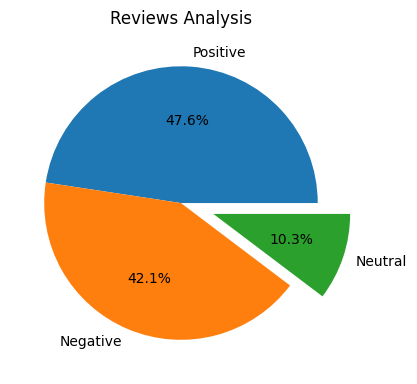

In [12]:
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(sentiment_count.values, labels = sentiment_count.index, 
        explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [13]:
# convert final analysis
df.to_csv("final_analysis.csv")

## Common Word

This section analyzes the words that commonly appear in reviews using the wordcloud package.

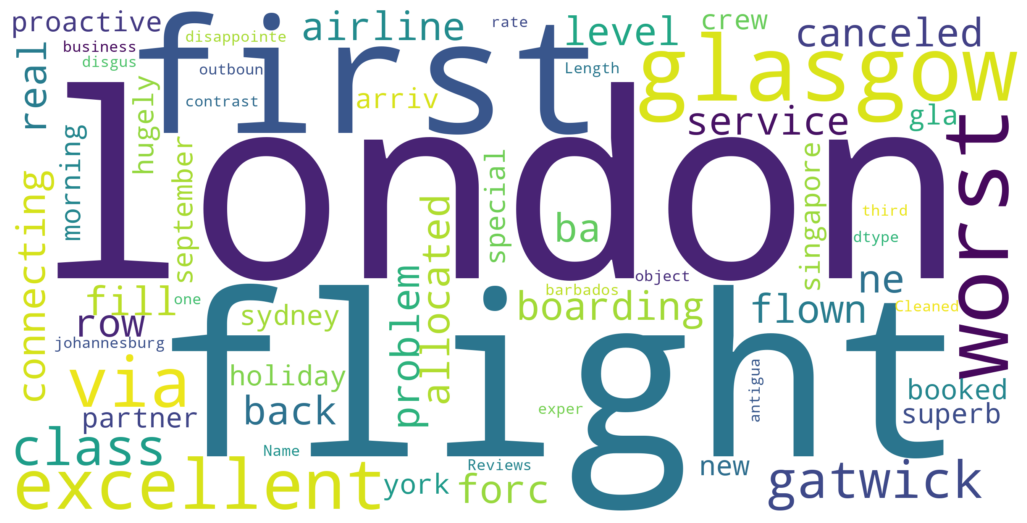

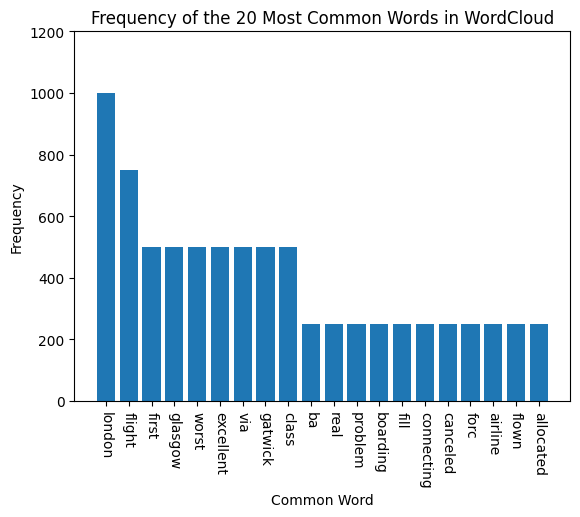

In [30]:
#To create a word cloud visualization of the most common words in the reviews
from wordcloud import WordCloud

# Create a WordCloud object based on the word frequencies obtained
def wordcloud_text(texts):
    wordcloud = WordCloud(width=800, 
                        height=400, 
                        background_color='white',
                        scale=3,
                        random_state=1)
    wordcloud = wordcloud.generate(str(texts))

    # Get the word frequencies from the WordCloud object
    word_frequencies = wordcloud.words_

    # Sort the word frequencies in descending order
    sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

    # Create a list of common words
    common_words = [word for word, frequency in sorted_word_frequencies[:20]]

    # Create a list of word frequencies
    word_frequencies = [frequency for word, frequency in sorted_word_frequencies[:20]]

    # Set a limit of 5000 for the word frequencies
    word_frequencies = [min(frequency, 5000) for frequency in word_frequencies]

    # Convert the word frequencies to normal numbers
    word_frequencies = [int(frequency * 1000) for frequency in word_frequencies]

    plt.figure(figsize=(13, 10))
    plt.axis('off')

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

    # Create a bar plot
    # Change the y-axis limit to 5000
    plt.ylim(0, 1200)
    plt.bar(common_words, word_frequencies)
    plt.xlabel('Common Word')
    plt.ylabel('Frequency')
    plt.title('Frequency of the 20 Most Common Words in WordCloud')
    plt.xticks(rotation=-90)
    plt.show()
wordcloud_text(df["Cleaned Reviews"])